### Structure matrix and scaling using real geo data

In [1]:
from pysal.lib import weights
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas


# Ignore FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Getting the Q matrix from the Geo data

In [2]:
# import shapefile
gdf = gpd.read_file('./data/DEU_adm/DEU_adm3.shp')

In [3]:
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,1,Breisgau-Hochschwarzwald,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.55564 47.87053, 7.55578 47.87120, ..."
1,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,2,Emmendingen,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.57809 48.11961, 7.57786 48.12139, ..."
2,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,3,Freiburg,NaN,NaN,NaN,NaN,"POLYGON ((7.82635 48.07057, 7.83203 48.06703, ..."
3,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,4,Konstanz,Landkreise,Rural district,NaN,Constance,"MULTIPOLYGON (((8.85385 47.68377, 8.85416 47.6..."
4,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,5,Lörrach \r\nLörrach \r\n,Landkreise,Rural district,NaN,Lörrach,"POLYGON ((7.63238 47.56242, 7.63560 47.56353, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,86,DEU,Germany,16,Thüringen,42,Thüringen,431,Suhl Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((10.58515 50.58276, 10.57932 50.58276..."
431,86,DEU,Germany,16,Thüringen,42,Thüringen,432,Unstrut-Hainich,Landkreise,Rural district,NaN,Unstrut-Hainich-Kreis,"POLYGON ((10.87941 51.09616, 10.87351 51.09613..."
432,86,DEU,Germany,16,Thüringen,42,Thüringen,433,Wartburgkreis,Landkreise,Rural district,NaN,NaN,"POLYGON ((10.02528 50.99648, 10.03120 51.00016..."
433,86,DEU,Germany,16,Thüringen,42,Thüringen,434,Weimar Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((11.25191 51.03471, 11.25189 51.03099..."


In [4]:
#get the uniques values of the column 'NAME_1'
gdf['NAME_2'].unique()

array(['Freiburg', 'Karlsruhe', 'Stuttgart', 'Tübingen', 'Mittelfranken',
       'Niederbayern', 'Oberbayern', 'Oberfranken', 'Oberpfalz',
       'Schwaben', 'Unterfranken', 'Berlin', 'Brandenburg', 'Bremen',
       'Bremerhaven', 'Hamburg', 'Darmstadt', 'Gießen', 'Kassel',
       'Mecklenburg-Vorpommern', 'Braunschweig', 'Hannover', 'Lüneburg',
       'Luneburg', 'Weser-Ems', 'Arnsberg', 'Düsseldorf', 'Detmold',
       'Köln', 'Munster', 'Koblenz', 'Rheinhessen-Pfalz', 'Trier',
       'Saarland', 'Dessau', 'Halle', 'Magdeburg', 'Chemnitz', 'Dresden',
       'Leipzig', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [5]:
# filter the dataframe by getting only the rows where 'NAME_1' is 'Arnsberg'
gdf_arnsberg = gdf[gdf['NAME_2'] == 'Arnsberg']

In [6]:
gdf_arnsberg

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
251,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,252,Bochum Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((7.11058 51.47466, 7.11639 51.47846, ..."
252,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,253,Dortmund Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((7.51410 51.41530, 7.46648 51.41369, ..."
253,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,254,Ennepe-Ruhr,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.30414 51.23813, 7.30380 51.24184, ..."
254,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,255,Hagen Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((7.58738 51.38815, 7.59357 51.38466, ..."
255,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,256,Hamm Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((7.94883 51.70022, 7.94908 51.69651, ..."
256,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,257,Herne Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((7.15122 51.50123, 7.14539 51.50106, ..."
257,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,258,Hochsauerlandkreis,Landkreise,Rural district,NaN,NaN,"POLYGON ((8.24166 51.10269, 8.24713 51.11019, ..."
258,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,259,Märkischer Kreis,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.51759 51.26377, 7.52954 51.26417, ..."
259,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,260,Olpe,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.85449 50.92636, 7.84826 50.92985, ..."
260,86,DEU,Germany,10,Nordrhein-Westfalen,26,Arnsberg,261,Siegen-Wittgenstein,Landkreise,Rural district,NaN,NaN,"POLYGON ((8.05282 50.69913, 8.04970 50.72892, ..."


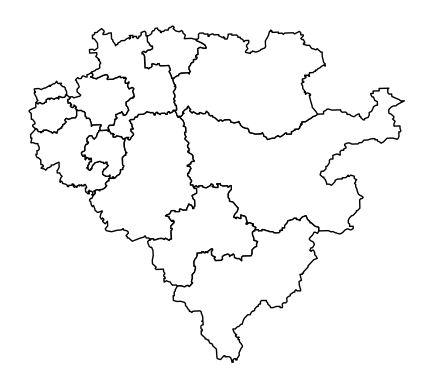

In [7]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf_arnsberg.plot(facecolor="w", edgecolor="k", ax=ax)

# Remove axes
ax.set_axis_off()

In [8]:
gdf_arnsberg.shape

(12, 14)

In [9]:
# filter the dataframe by getting only the rows where 'NAME_1' is 'Arnsberg'
gdf_Mittelfranken = gdf[gdf['NAME_2'] == 'Mittelfranken']

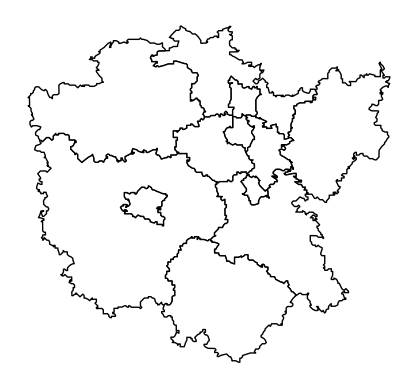

In [10]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf_Mittelfranken.plot(facecolor="w", edgecolor="k", ax=ax)

# Remove axes
ax.set_axis_off()

In [11]:
# Set the CRS to a simple Cartesian coordinate system
gdf_arnsberg.crs = "EPSG:3395"  # This is a commonly used projected CRS

In [12]:
# Set the CRS to a simple Cartesian coordinate system
gdf_Mittelfranken.crs = "EPSG:3395"  # This is a commonly used projected CRS

In [13]:
# Set the CRS to a simple Cartesian coordinate system
gdf.crs = "EPSG:3395"  # This is a commonly used projected CRS

In [14]:
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,1,Breisgau-Hochschwarzwald,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.556 47.871, 7.556 47.871, 7.558 47..."
1,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,2,Emmendingen,Landkreise,Rural district,NaN,NaN,"POLYGON ((7.578 48.120, 7.578 48.121, 7.588 48..."
2,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,3,Freiburg,NaN,NaN,NaN,NaN,"POLYGON ((7.826 48.071, 7.832 48.067, 7.832 48..."
3,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,4,Konstanz,Landkreise,Rural district,NaN,Constance,"MULTIPOLYGON (((8.854 47.684, 8.854 47.686, 8...."
4,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,5,Lörrach \r\nLörrach \r\n,Landkreise,Rural district,NaN,Lörrach,"POLYGON ((7.632 47.562, 7.636 47.564, 7.638 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,86,DEU,Germany,16,Thüringen,42,Thüringen,431,Suhl Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((10.585 50.583, 10.579 50.583, 10.573..."
431,86,DEU,Germany,16,Thüringen,42,Thüringen,432,Unstrut-Hainich,Landkreise,Rural district,NaN,Unstrut-Hainich-Kreis,"POLYGON ((10.879 51.096, 10.874 51.096, 10.856..."
432,86,DEU,Germany,16,Thüringen,42,Thüringen,433,Wartburgkreis,Landkreise,Rural district,NaN,NaN,"POLYGON ((10.025 50.996, 10.031 51.000, 10.031..."
433,86,DEU,Germany,16,Thüringen,42,Thüringen,434,Weimar Städte,Kreisfreie Städte,Urban district,NaN,NaN,"POLYGON ((11.252 51.035, 11.252 51.031, 11.264..."


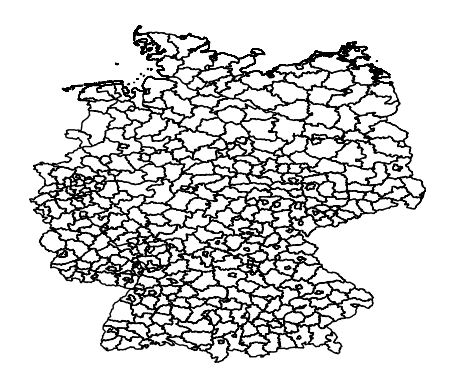

In [15]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf.plot(facecolor="w", edgecolor="k", ax=ax)

# Remove axes
ax.set_axis_off()

#### Queen contiguity matrix

In [53]:
# lattice stored in a geo-table
wq = weights.contiguity.Queen.from_dataframe(gdf_arnsberg)
neighbors_q = wq.neighbors

In [54]:
neighbors_q

{0: [1, 2, 5],
 1: [0, 11, 2, 3],
 2: [0, 1, 3, 7],
 3: [1, 2, 11, 7],
 4: [10, 11],
 5: [0],
 6: [8, 9, 10, 7],
 7: [2, 3, 6, 8, 10, 11],
 8: [9, 6, 7],
 9: [8, 6],
 10: [11, 4, 6, 7],
 11: [1, 3, 4, 7, 10]}

In [55]:
Q = pandas.DataFrame(*wq.full()).astype(int)

In [56]:
Q = Q.multiply(-1)

In [57]:
# Iterate over the dictionary
for key, value in neighbors_q.items():
    count = len(value)
    Q[key][key] = count  # Fill the diagonal with count
    
# Q.index = gdf["FIPS"].values

In [58]:
Q

,0,1,2,3,4,5,6,7,8,9,10,11
0,3,-1,-1,0,0,-1,0,0,0,0,0,0
1,-1,4,-1,-1,0,0,0,0,0,0,0,-1
2,-1,-1,4,-1,0,0,0,-1,0,0,0,0
3,0,-1,-1,4,0,0,0,-1,0,0,0,-1
4,0,0,0,0,2,0,0,0,0,0,-1,-1
5,-1,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,4,-1,-1,-1,-1,0
7,0,0,-1,-1,0,0,-1,6,-1,0,-1,-1
8,0,0,0,0,0,0,-1,-1,3,-1,0,0
9,0,0,0,0,0,0,-1,0,-1,2,0,0


### Saving to further computation

In [59]:
import numpy as np
from scipy.linalg import null_space

In [60]:
# Df into matrix
Q_matrix = Q.to_numpy()

In [61]:
Q_matrix

array([[ 3, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0],
       [-1,  4, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1],
       [-1, -1,  4, -1,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0, -1, -1,  4,  0,  0,  0, -1,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0, -1, -1],
       [-1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4, -1, -1, -1, -1,  0],
       [ 0,  0, -1, -1,  0,  0, -1,  6, -1,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  3, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1,  2,  0,  0],
       [ 0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  4, -1],
       [ 0, -1,  0, -1, -1,  0,  0, -1,  0,  0, -1,  5]])

In [ ]:
import pickle

In [ ]:
# Save matrix to a file
with open('matrix_mittelfranken.pkl', 'wb') as f:
    pickle.dump(Q_matrix, f)


In [ ]:
# Specify the file path
file_path = 'matrix_data.csv'

# Save the matrix to CSV
np.savetxt(file_path, Q_matrix, delimiter=',')
